### Student Information
Name: 蔡宗達

Student ID: 1110200001

GitHub ID: da111020001-lab

Environment: VS Code (Python 3.12)

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [12]:
### Begin Assignment Here

# ===============================================
# Phase 1 on New Dataset (Reddit-stock-sentiment.csv)
# ===============================================

# Step 1: Import Libraries
# test code for environment setup
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
# If you get "ModuleNotFoundError: No module named 'PAMI'"
# run the following in a new Jupyter cell:
# !pip3 install PAMI
import PAMI
import umap

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\da314\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# Step 2: Load the new dataset
df = pd.read_csv("newdataset/Reddit-stock-sentiment.csv")
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (847, 16)


,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0


In [14]:
# Step 3: Keep only relevant columns
# 我們只需要文字內容與情緒標籤
df = df[['text', 'label']].dropna(subset=['text'])

# 確保文字都是字串型態
df['text'] = df['text'].astype(str)

# 檢查是否還有空白或全為空字串的資料
empty_text = (df['text'].str.len() == 0).sum()
print(f"Empty text rows: {empty_text}")

print("Simplified dataset shape:", df.shape)
df.head()

Empty text rows: 0
Simplified dataset shape: (824, 2)


,text,label
0,Calls on retards,-1.0
1,Stunt as in like why did they even make a big ...,0.0
2,Seeing lots of red in the ticker.,0.0
3,Vision Marine Technologies Inc. is rewriting t...,1.0
4,He didn’t say thank you.,-1.0


In [15]:
# Step 4: Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# 檢查是否有空白字串（非 NaN 但內容為空）
empty_text_count = (df['text'].str.strip() == '').sum()
print(f"\nRows with empty text (after stripping spaces): {empty_text_count}")


Missing values per column:
text     0
label    0
dtype: int64

Rows with empty text (after stripping spaces): 0


In [5]:
# Step 5: Check for duplicates
duplicates = df.duplicated(subset=['text']).sum()
print(f"\nNumber of duplicate text records: {duplicates}")


Number of duplicate text records: 23


In [16]:
# Step 5: Check for duplicates
duplicates = df.duplicated(subset=['text']).sum()
print(f"\nNumber of duplicate text records: {duplicates}")

# 如果有重複，選擇保留第一筆、刪除其餘
if duplicates > 0:
    df = df.drop_duplicates(subset=['text']).reset_index(drop=True)
    print("Duplicates removed. New dataset shape:", df.shape)
else:
    print("No duplicates found.")


Number of duplicate text records: 0
No duplicates found.


In [18]:
# Step 6: Sampling (like in Phase 1)
# Create a smaller sample for testing visualization
X_sample = df.sample(frac=0.1, random_state=42)
print("Sample size:", X_sample.shape)
print("\nLabel distribution in sample:")
print(X_sample['label'].value_counts(normalize=True))

Sample size: (82, 2)

Label distribution in sample:
label
 0.0    0.439024
-1.0    0.329268
 1.0    0.231707
Name: proportion, dtype: float64


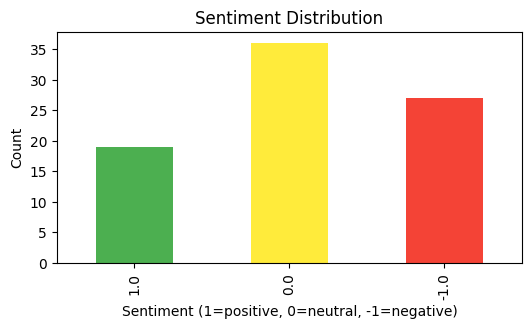

In [19]:
# Step 7: Plot category (sentiment) distribution
plt.figure(figsize=(6,3))

# 先把 label 順序固定（正向→中立→負向）
label_order = [1.0, 0.0, -1.0]
X_sample['label'].value_counts().reindex(label_order).plot(
    kind='bar',
    color=['#4caf50', '#ffeb3b', '#f44336'],
    title='Sentiment Distribution'
)

plt.xlabel('Sentiment (1=positive, 0=neutral, -1=negative)')
plt.ylabel('Count')
plt.show()


In [25]:
# Step 8: Feature Creation (token count)
vectorizer = CountVectorizer(
    lowercase=True, 
    stop_words='english', 
    min_df=5
)

X_counts = vectorizer.fit_transform(X_sample['text'])
print("Shape of Document-Term Matrix:", X_counts.shape)
print("Example feature names:", vectorizer.get_feature_names_out()[:10])

Shape of Document-Term Matrix: (82, 13)
Example feature names: ['company' 'doing' 'economy' 'just' 'like' 'market' 'people' 'right'
 'tariffs' 'time']



Top 20 most frequent terms:
       word  count
5    market     11
3      just      9
4      like      9
11    trump      9
0   company      8
9      time      7
2   economy      6
1     doing      6
6    people      5
8   tariffs      5
7     right      5
10    today      5
12     want      5


C:\Users\da314\AppData\Local\Temp\ipykernel_4676\1094156014.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='word', y='count', data=freq_df.head(20), palette='viridis')


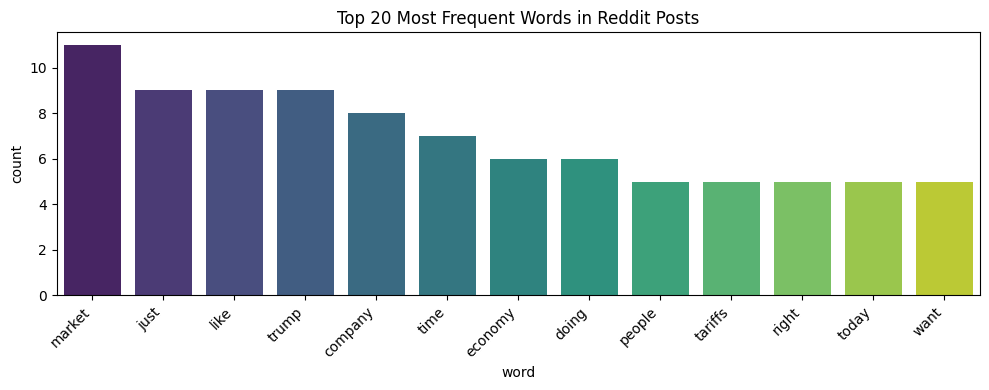

In [26]:
# Step 9: Check top 20 frequent terms
word_freq = np.asarray(X_counts.sum(axis=0)).flatten()
vocab = vectorizer.get_feature_names_out()
freq_df = pd.DataFrame({'word': vocab, 'count': word_freq})
freq_df = freq_df.sort_values(by='count', ascending=False)

print("\nTop 20 most frequent terms:")
print(freq_df.head(20))

plt.figure(figsize=(10,4))
sns.barplot(x='word', y='count', data=freq_df.head(20), palette='viridis')
plt.title('Top 20 Most Frequent Words in Reddit Posts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [27]:
from sklearn.model_selection import train_test_split

# Step 10: Split for future tasks (optional)
X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['label'], test_size=0.2, random_state=42, stratify=df['label']
)
print("Train size:", X_train.shape, "Test size:", X_test.shape)

# 檢查訓練集與測試集的標籤分布
print("\nLabel distribution in training set:")
print(y_train.value_counts(normalize=True))
print("\nLabel distribution in test set:")
print(y_test.value_counts(normalize=True))

Train size: (659,) Test size: (165,)

Label distribution in training set:
label
 0.0    0.487102
-1.0    0.382398
 1.0    0.130501
Name: proportion, dtype: float64

Label distribution in test set:
label
 0.0    0.484848
-1.0    0.381818
 1.0    0.133333
Name: proportion, dtype: float64


In [28]:
# Step 11: TF-IDF Feature Transformation
from sklearn.feature_extraction.text import TfidfVectorizer

# 建立 TF-IDF 向量器
tfidf_vectorizer = TfidfVectorizer(
    lowercase=True,
    stop_words='english',
    min_df=5,
    max_df=0.9,
    max_features=2000
)

# 套用在訓練集與測試集
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("TF-IDF Matrix Shapes:")
print("Train:", X_train_tfidf.shape)
print("Test:", X_test_tfidf.shape)

# 查看前幾個詞彙
print("\nExample feature names:")
print(tfidf_vectorizer.get_feature_names_out()[:15])


TF-IDF Matrix Shapes:
Train: (659, 318)
Test: (165, 318)

Example feature names:
['10' '100' '12' '15' '20' '2025' '30' '50' '90' 'able' 'actual'
 'actually' 'administration' 'advice' 'ago']


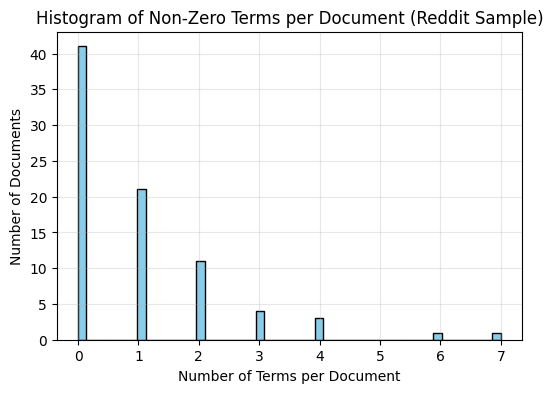

Average number of non-zero terms per document: 1.0
Sparsity: 0.9250


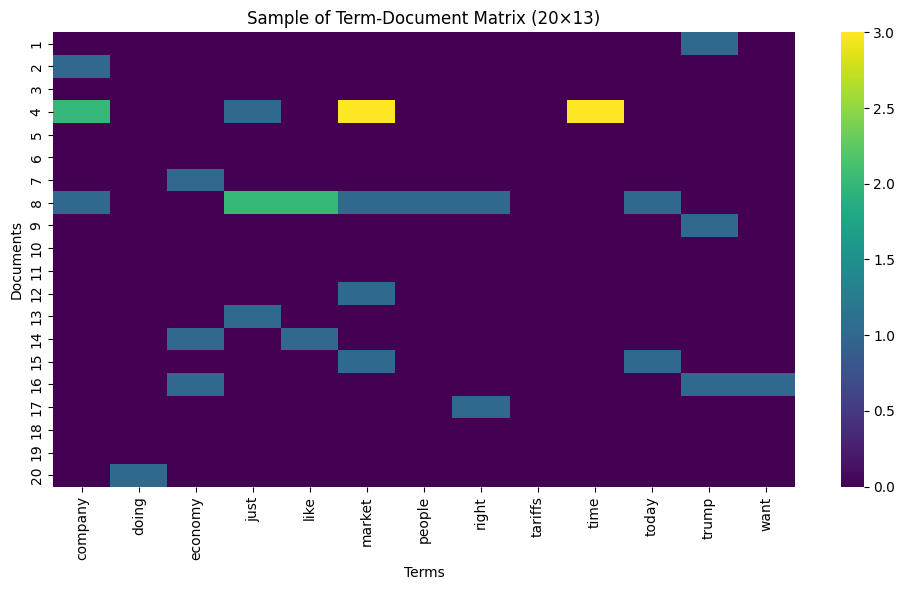

In [33]:
# Visualize sparsity of the term-document matrix
import matplotlib.pyplot as plt
import numpy as np

# 計算每一篇貼文中非零詞的數量
nonzero_per_doc = (X_counts > 0).sum(axis=1)
nonzero_per_doc = np.asarray(nonzero_per_doc).flatten()

plt.figure(figsize=(6,4))
plt.hist(nonzero_per_doc, bins=50, color='skyblue', edgecolor='k')
plt.title('Histogram of Non-Zero Terms per Document (Reddit Sample)')
plt.xlabel('Number of Terms per Document')
plt.ylabel('Number of Documents')
plt.grid(alpha=0.3)
plt.show()

print(f"Average number of non-zero terms per document: {nonzero_per_doc.mean():.1f}")
print(f"Sparsity: {1 - (X_counts.nnz / (X_counts.shape[0]*X_counts.shape[1])):.4f}")


import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# 自動取最小的 20 或實際可用的最大詞數，避免超出
n_docs = min(20, X_counts.shape[0])
n_terms = min(20, X_counts.shape[1])

sample_matrix = X_counts[:n_docs, :n_terms].toarray()
sample_terms = vectorizer.get_feature_names_out()[:n_terms]

plt.figure(figsize=(10, 6))
sns.heatmap(sample_matrix, cmap='viridis')

plt.title(f'Sample of Term-Document Matrix ({n_docs}×{n_terms})')
plt.xlabel('Terms')
plt.ylabel('Documents')

# 這裡改成自動根據實際詞數設定 tick
plt.xticks(np.arange(n_terms) + 0.5, sample_terms, rotation=90)
plt.yticks(np.arange(n_docs) + 0.5, np.arange(1, n_docs + 1))
plt.tight_layout()
plt.show()


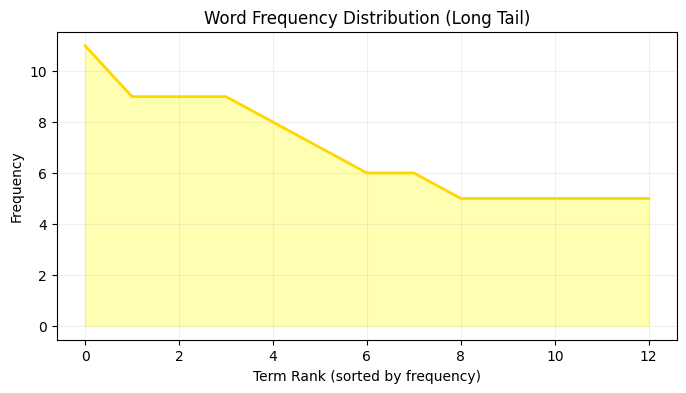

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# 確保 freq_df 已經照 count 排序過
freq_df_sorted = freq_df.sort_values(by='count', ascending=False).reset_index(drop=True)

plt.figure(figsize=(8, 4))
plt.plot(freq_df_sorted['count'].values, color='gold', linewidth=2)
plt.fill_between(range(len(freq_df_sorted)), freq_df_sorted['count'].values, color='yellow', alpha=0.3)

plt.title('Word Frequency Distribution (Long Tail)')
plt.xlabel('Term Rank (sorted by frequency)')
plt.ylabel('Frequency')
plt.grid(alpha=0.2)
plt.show()


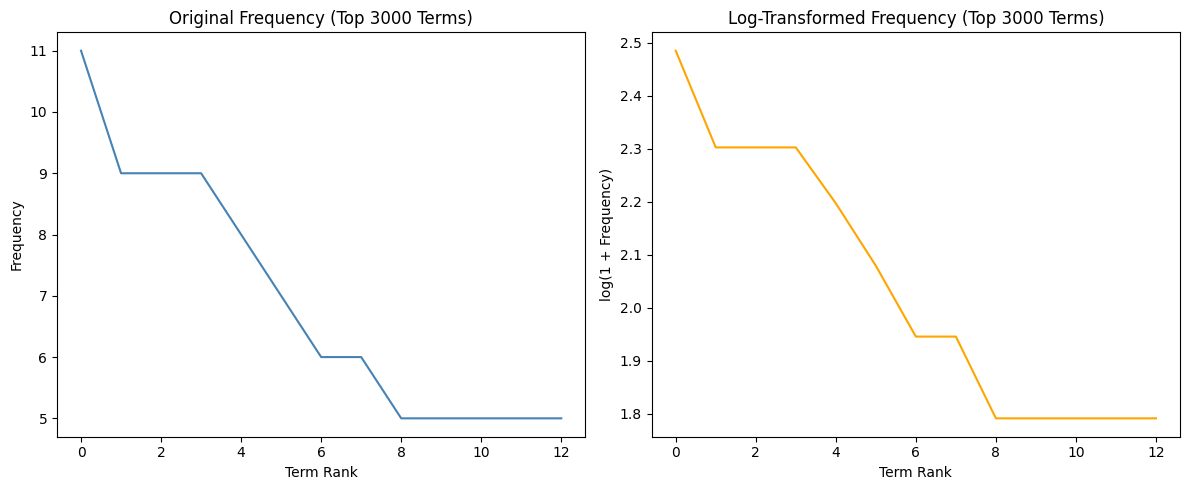

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: 對原始詞頻取 log(1 + frequency)
freq_df_sorted = freq_df.sort_values(by='count', ascending=False).reset_index(drop=True)
freq_df_sorted['log_count'] = np.log1p(freq_df_sorted['count'])

# Step 2: 畫出原始 vs log 轉換後的詞頻比較
plt.figure(figsize=(12, 5))

# 左圖：原始頻率
plt.subplot(1, 2, 1)
plt.plot(freq_df_sorted['count'][:3000], color='steelblue')
plt.title('Original Frequency (Top 3000 Terms)')
plt.xlabel('Term Rank')
plt.ylabel('Frequency')

# 右圖：log(1 + frequency)
plt.subplot(1, 2, 2)
plt.plot(freq_df_sorted['log_count'][:3000], color='orange')
plt.title('Log-Transformed Frequency (Top 3000 Terms)')
plt.xlabel('Term Rank')
plt.ylabel('log(1 + Frequency)')

plt.tight_layout()
plt.show()


# Phase 2

In [ ]:
### Begin Assignment Here

In [3]:
# === Phase 2 Initialization ===
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# 若有自定義 helper
from helpers.data_mining_helpers import *
from helpers.text_analysis import *

# 設定資料路徑
train_dir = r"C:\Users\da314\OneDrive - MSFT\桌面\Morris\University\DataMining\DM2025Labs\DM2025-Lab1-Exercise\20news-bydate\20news-bydate-train"
test_dir  = r"C:\Users\da314\OneDrive - MSFT\桌面\Morris\University\DataMining\DM2025Labs\DM2025-Lab1-Exercise\20news-bydate\20news-bydate-test"

# 載入資料
twenty_train = load_files(train_dir, encoding='latin1', decode_error='ignore')
twenty_test = load_files(test_dir, encoding='latin1', decode_error='ignore')

print(f"訓練集文件數量: {len(twenty_train.data)}")
print(f"測試集文件數量: {len(twenty_test.data)}")
print(f"分類類別數: {len(twenty_train.target_names)}")

訓練集文件數量: 11314
測試集文件數量: 7532
分類類別數: 20


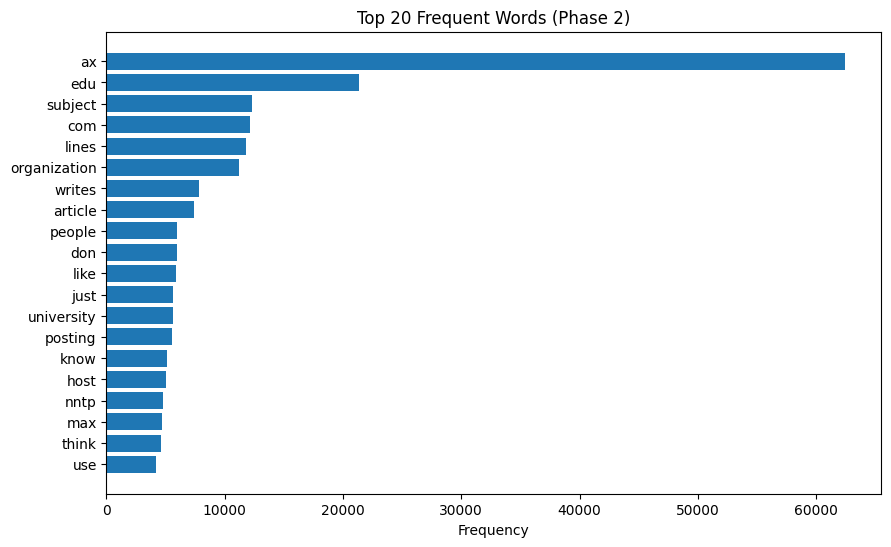

,term,frequency
278,ax,62406
661,edu,21321
1745,subject,12264
463,com,12133
1068,lines,11835


In [7]:
# === Phase 2: Finding Frequent Patterns ===

# 建立文字向量（詞袋模型）
vectorizer = CountVectorizer(stop_words='english', max_features=2000)
X_counts = vectorizer.fit_transform(twenty_train.data)

# 將特徵轉為 DataFrame
term_frequencies = np.asarray(X_counts.sum(axis=0)).ravel()
vocab = vectorizer.get_feature_names_out()
tf_df = pd.DataFrame({'term': vocab, 'frequency': term_frequencies})
tf_df = tf_df.sort_values(by='frequency', ascending=False).head(20)

# 顯示最常出現的詞
plt.figure(figsize=(10,6))
plt.barh(tf_df['term'], tf_df['frequency'])
plt.gca().invert_yaxis()
plt.title("Top 20 Frequent Words (Phase 2)")
plt.xlabel("Frequency")
plt.show()

tf_df.head()

In [5]:
# === Phase 2: New Dataset Processing ===

# 建立詞頻向量器
count_vectorizer = CountVectorizer(stop_words='english', max_features=5000)
X_train_counts = count_vectorizer.fit_transform(twenty_train.data)
X_test_counts = count_vectorizer.transform(twenty_test.data)

# 使用 MultinomialNB 作為基準模型（詞頻特徵）
nb_model_freq = MultinomialNB()
nb_model_freq.fit(X_train_counts, twenty_train.target)
y_pred_freq = nb_model_freq.predict(X_test_counts)

# 評估結果
print("=== Naive Bayes (Word Frequency) ===")
print(classification_report(twenty_test.target, y_pred_freq, target_names=twenty_train.target_names))
print("準確率:", accuracy_score(twenty_test.target, y_pred_freq))


=== Naive Bayes (Word Frequency) ===
                          precision    recall  f1-score   support

             alt.atheism       0.70      0.73      0.72       319
           comp.graphics       0.52      0.77      0.62       389
 comp.os.ms-windows.misc       0.33      0.00      0.01       394
comp.sys.ibm.pc.hardware       0.48      0.68      0.57       392
   comp.sys.mac.hardware       0.69      0.81      0.74       385
          comp.windows.x       0.78      0.67      0.72       395
            misc.forsale       0.71      0.83      0.77       390
               rec.autos       0.78      0.87      0.82       396
         rec.motorcycles       0.78      0.92      0.84       398
      rec.sport.baseball       0.89      0.88      0.88       397
        rec.sport.hockey       0.96      0.91      0.94       399
               sci.crypt       0.93      0.85      0.89       396
         sci.electronics       0.68      0.69      0.68       393
                 sci.med       0.88   

In [6]:
# === Phase 2: TF-IDF + Naive Bayes Classifier ===

# 產生 TF-IDF 特徵矩陣
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(twenty_train.data)
X_test_tfidf = tfidf_vectorizer.transform(twenty_test.data)

# Multinomial NB 適合 TF-IDF 權重
nb_model_tfidf = MultinomialNB()
nb_model_tfidf.fit(X_train_tfidf, twenty_train.target)
y_pred_tfidf = nb_model_tfidf.predict(X_test_tfidf)

print("=== Naive Bayes (TF-IDF Features) ===")
print(classification_report(twenty_test.target, y_pred_tfidf, target_names=twenty_train.target_names))
print("準確率:", accuracy_score(twenty_test.target, y_pred_tfidf))

# 比較兩種模型準確率
acc_freq = accuracy_score(twenty_test.target, y_pred_freq)
acc_tfidf = accuracy_score(twenty_test.target, y_pred_tfidf)
print(f"\n[比較結果] Word Frequency: {acc_freq:.4f} | TF-IDF: {acc_tfidf:.4f}")


=== Naive Bayes (TF-IDF Features) ===
                          precision    recall  f1-score   support

             alt.atheism       0.74      0.66      0.70       319
           comp.graphics       0.62      0.72      0.67       389
 comp.os.ms-windows.misc       0.71      0.74      0.72       394
comp.sys.ibm.pc.hardware       0.63      0.71      0.67       392
   comp.sys.mac.hardware       0.79      0.76      0.77       385
          comp.windows.x       0.80      0.75      0.77       395
            misc.forsale       0.79      0.84      0.81       390
               rec.autos       0.83      0.86      0.85       396
         rec.motorcycles       0.84      0.91      0.88       398
      rec.sport.baseball       0.90      0.90      0.90       397
        rec.sport.hockey       0.89      0.96      0.93       399
               sci.crypt       0.91      0.90      0.91       396
         sci.electronics       0.73      0.60      0.66       393
                 sci.med       0.89  

In [22]:
import importlib
from helpers import transactional_database_support as tds
importlib.reload(tds)

<module 'helpers.transactional_database_support' from 'c:\\Users\\da314\\OneDrive - MSFT\\桌面\\Morris\\University\\DataMining\\DM2025Labs\\DM2025-Lab1-Exercise\\helpers\\transactional_database_support.py'>

In [29]:
obj = tds.TransactionalDatabase('td_freq_db_alt_atheism.csv')
obj.run()
obj.printStats()

# 找 frequent patterns
patterns = obj.find_frequent_patterns(min_support=10)
print(f"Found {len(patterns)} frequent patterns.")
for p, s in list(patterns.items())[:10]:
    print(p, "=>", s)


Total transactions: 480
Unique items: 11250
Top 10 frequent items:
  stay: 32
  snm6394: 32
  date: 31
  deleted: 30
  comes: 30
  getting: 30
  james: 29
  21: 29
  big: 29
  physics: 29
Found 2816 frequent patterns.
('1993apr5',) => 25
('ability',) => 18
('absence',) => 10
('allow',) => 20
('allows',) => 11
('already',) => 27
('alternatives',) => 10
('amount',) => 13
('arguing',) => 12
('beings',) => 16


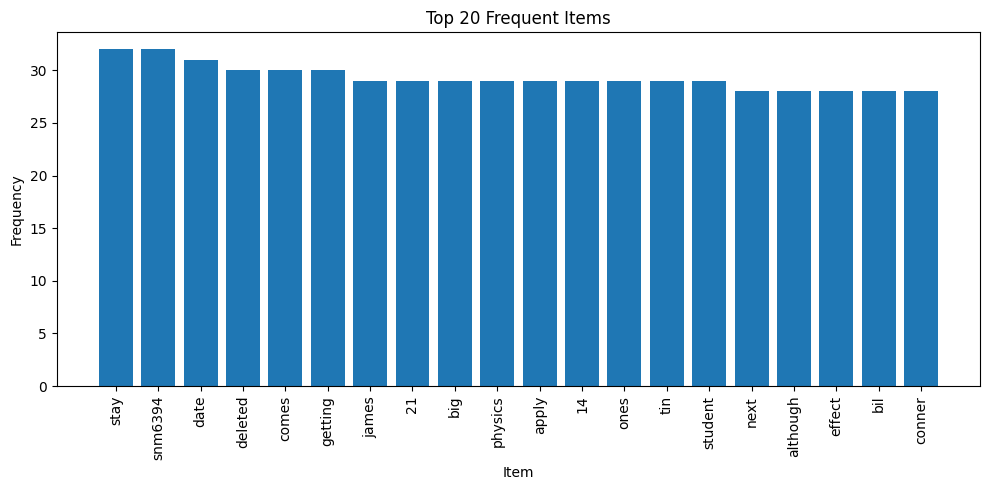

In [31]:
import matplotlib.pyplot as plt

# 取前 20 名 item
top_items = sorted(obj.item_freq.items(), key=lambda x: x[1], reverse=True)[:20]
items, counts = zip(*top_items)

plt.figure(figsize=(10,5))
plt.bar(items, counts)
plt.xticks(rotation=90)
plt.title("Top 20 Frequent Items")
plt.xlabel("Item")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


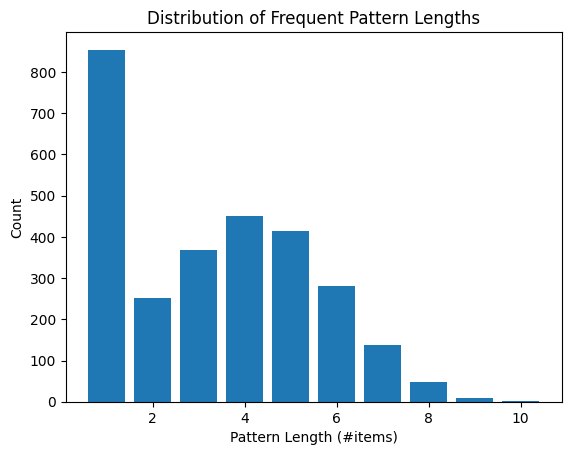

In [32]:
import collections
pattern_lengths = [len(p) for p in patterns.keys()]
cnt = collections.Counter(pattern_lengths)

plt.bar(cnt.keys(), cnt.values())
plt.title("Distribution of Frequent Pattern Lengths")
plt.xlabel("Pattern Length (#items)")
plt.ylabel("Count")
plt.show()


c:\Users\da314\OneDrive - MSFT\桌面\Morris\University\DataMining\DM2025Labs\DM2025-Lab1-Exercise\.venv\Lib\site-packages\matplotlib\cbook.py:733: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  x = np.array(x, subok=True, copy=copy)


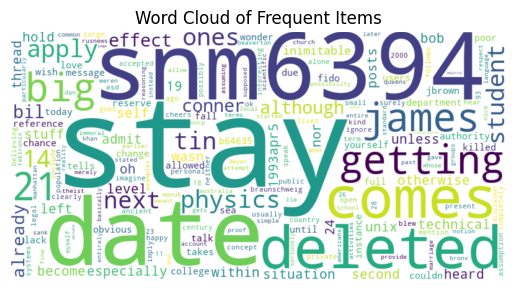

In [33]:
from wordcloud import WordCloud

wc = WordCloud(width=800, height=400, background_color='white')
wc.generate_from_frequencies(obj.item_freq)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Frequent Items")
plt.show()


### Phase 2: Data Preprocessing Improvement

1. 可以加入更嚴謹的清理，例如移除 email header、簽名區與 URL。
2. 詞幹化 (stemming) 或詞形還原 (lemmatization) 可減少同義詞的重複。
3. 移除過於通用的詞（例如 "people", "think", "use"）以提升 discriminative power。
4. 若分類數多，可嘗試 TF-IDF + n-gram 特徵（例如 bigram）。
5. 針對不同主題群組（如 comp.*、rec.*），可單獨調整 stopword 清單。

In [8]:
# === Phase 2: Data Preprocessing Improvement ===
import re
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin

# 自訂文字清理轉換器
class TextCleaner(TransformerMixin):
    def transform(self, X, **transform_params):
        cleaned = []
        for text in X:
            text = text.lower()                                     # 全部轉小寫
            text = re.sub(r"http\S+|www\S+", " ", text)             # 移除 URL
            text = re.sub(r"\S+@\S+", " ", text)                    # 移除 email
            text = re.sub(r"\b[\w\.-]+(?:\.[\w\.-]+)+\b", " ", text) # 移除網域名稱
            text = re.sub(r"[^a-z\s]", " ", text)                   # 移除非字母
            text = re.sub(r"\s+", " ", text).strip()                # 移除多餘空白
            cleaned.append(text)
        return cleaned
    def fit(self, X, y=None, **fit_params):
        return self

# 建立一個經清理 + TF-IDF + NB 的管線
clean_tfidf_nb = Pipeline([
    ('cleaner', TextCleaner()),
    ('tfidf', TfidfVectorizer(stop_words='english',
                              max_features=5000,
                              ngram_range=(1,2))),   # 加入 bigram 特徵
    ('nb', MultinomialNB())
])

# 訓練與預測
clean_tfidf_nb.fit(twenty_train.data, twenty_train.target)
y_pred_clean = clean_tfidf_nb.predict(twenty_test.data)

print("=== Naive Bayes (Improved Preprocessing + TF-IDF) ===")
print(classification_report(twenty_test.target, y_pred_clean, target_names=twenty_train.target_names))
print("準確率:", accuracy_score(twenty_test.target, y_pred_clean))


=== Naive Bayes (Improved Preprocessing + TF-IDF) ===
                          precision    recall  f1-score   support

             alt.atheism       0.68      0.63      0.65       319
           comp.graphics       0.60      0.71      0.65       389
 comp.os.ms-windows.misc       0.69      0.76      0.72       394
comp.sys.ibm.pc.hardware       0.67      0.71      0.69       392
   comp.sys.mac.hardware       0.76      0.77      0.77       385
          comp.windows.x       0.82      0.76      0.79       395
            misc.forsale       0.81      0.85      0.83       390
               rec.autos       0.82      0.85      0.83       396
         rec.motorcycles       0.83      0.90      0.86       398
      rec.sport.baseball       0.88      0.91      0.89       397
        rec.sport.hockey       0.91      0.96      0.94       399
               sci.crypt       0.92      0.90      0.91       396
         sci.electronics       0.72      0.59      0.65       393
                 sci.

In [9]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

def lemmatize_text(texts):
    lemmatized = []
    for text in texts:
        words = [lemmatizer.lemmatize(w) for w in text.split()]
        lemmatized.append(" ".join(words))
    return lemmatized

# 應用在前處理後的資料
train_clean = TextCleaner().transform(twenty_train.data)
test_clean  = TextCleaner().transform(twenty_test.data)
train_lemma = lemmatize_text(train_clean)
test_lemma  = lemmatize_text(test_clean)

# 重新訓練模型
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_lemma = tfidf.fit_transform(train_lemma)
X_test_lemma  = tfidf.transform(test_lemma)

nb_lemma = MultinomialNB()
nb_lemma.fit(X_train_lemma, twenty_train.target)
y_pred_lemma = nb_lemma.predict(X_test_lemma)

print("=== Naive Bayes (Lemmatized TF-IDF) ===")
print(classification_report(twenty_test.target, y_pred_lemma, target_names=twenty_train.target_names))
print("準確率:", accuracy_score(twenty_test.target, y_pred_lemma))


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\da314\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\da314\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


=== Naive Bayes (Lemmatized TF-IDF) ===
                          precision    recall  f1-score   support

             alt.atheism       0.71      0.61      0.65       319
           comp.graphics       0.65      0.75      0.69       389
 comp.os.ms-windows.misc       0.71      0.72      0.71       394
comp.sys.ibm.pc.hardware       0.65      0.75      0.70       392
   comp.sys.mac.hardware       0.77      0.80      0.78       385
          comp.windows.x       0.83      0.77      0.80       395
            misc.forsale       0.84      0.81      0.83       390
               rec.autos       0.88      0.87      0.87       396
         rec.motorcycles       0.86      0.93      0.89       398
      rec.sport.baseball       0.92      0.91      0.92       397
        rec.sport.hockey       0.93      0.97      0.95       399
               sci.crypt       0.88      0.91      0.89       396
         sci.electronics       0.76      0.64      0.70       393
                 sci.med       0.91

In [34]:
# === 找出全資料集最高頻的詞 ===
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np

vectorizer = CountVectorizer(stop_words='english', max_features=10000)
X_counts = vectorizer.fit_transform(twenty_train.data)
terms = vectorizer.get_feature_names_out()
frequencies = np.asarray(X_counts.sum(axis=0)).ravel()

df_freq = pd.DataFrame({'term': terms, 'freq': frequencies})
df_freq = df_freq.sort_values(by='freq', ascending=False)

print(df_freq.head(30))


              term   freq
1301            ax  62406
3280           edu  21321
8614       subject  12264
2243           com  12133
5418         lines  11835
6500  organization  11233
9841        writes   7844
1149       article   7438
6714        people   5975
3120           don   5953
5398          like   5865
5063          just   5602
9314    university   5586
6959       posting   5507
5176          know   5128
4492          host   4996
6248          nntp   4814
5725           max   4690
8938         think   4578
9367           use   4183
3107          does   4135
8986          time   4093
6200           new   3971
4118          good   3758
1799            ca   3544
2636            cs   3036
9671           way   3002
4105           god   2994
5617          make   2894
3067  distribution   2766


In [35]:
from collections import Counter
import numpy as np

# 將每個類別的 top N 詞抓出
top_words_per_class = {}
N = 50  # 每個類別取前 50 個詞
for i, cat in enumerate(twenty_train.target_names):
    docs = [twenty_train.data[j] for j in range(len(twenty_train.data)) if twenty_train.target[j] == i]
    X_cat = vectorizer.fit_transform(docs)
    terms = vectorizer.get_feature_names_out()
    freq = np.asarray(X_cat.sum(axis=0)).ravel()
    top_words = [t for t, _ in sorted(zip(terms, freq), key=lambda x: x[1], reverse=True)[:N]]
    top_words_per_class[cat] = top_words

# 統計在多數類別出現的詞
all_top_words = sum(top_words_per_class.values(), [])
common_terms = [w for w, c in Counter(all_top_words).items() if c > len(twenty_train.target_names) * 0.5]

print("在多數類別中都常見的詞：")
print(common_terms)


在多數類別中都常見的詞：
['edu', 'people', 'writes', 'com', 'subject', 'lines', 'don', 'organization', 'article', 'think', 'does', 'posting', 'just', 'like', 'know', 'nntp', 'host', 'time', 'university', 'good', 'use', 'ca', 'new']


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tfidf = TfidfVectorizer(stop_words='english', max_features=10000)
tfidf.fit(twenty_train.data)

idf_scores = pd.DataFrame({
    'term': tfidf.get_feature_names_out(),
    'idf': tfidf.idf_
}).sort_values(by='idf')

print(idf_scores.head(30))


              term       idf
8614       subject  1.000000
5418         lines  1.003275
6500  organization  1.040307
3280           edu  1.425460
9841        writes  1.676234
1149       article  1.763530
6959       posting  1.799441
4492          host  1.849008
2243           com  1.859390
6248          nntp  1.862107
9314    university  1.935925
5398          like  2.146863
5063          just  2.175368
3120           don  2.217169
5176          know  2.234634
8938         think  2.426233
3107          does  2.448932
3067  distribution  2.457626
6714        people  2.490821
8986          time  2.544016
4118          good  2.586720
7561         reply  2.591483
6200           new  2.634042
9367           use  2.637217
9671           way  2.712689
5617          make  2.744043
9814         world  2.772243
1799            ca  2.836677
9632          want  2.871095
8912        thanks  2.876852


In [37]:
# === 建立自動生成 custom stopwords 清單 ===

# 三份集合
high_freq_terms = {'ax', 'edu', 'subject', 'com', 'lines', 'organization', 'writes', 'article', 'people', 'think', 'use', 'time', 'good', 'make', 'know', 'just', 'like', 'don', 'university', 'posting', 'host', 'nntp', 'new', 'way', 'ca'}
common_across_classes = {'edu', 'people', 'writes', 'com', 'subject', 'lines', 'don', 'organization', 'article', 'think', 'does', 'posting', 'just', 'like', 'know', 'nntp', 'host', 'time', 'university', 'good', 'use', 'ca', 'new'}
low_idf_terms = {'subject', 'lines', 'organization', 'edu', 'writes', 'article', 'posting', 'host', 'com', 'nntp', 'university', 'like', 'think', 'people', 'time', 'good', 'new', 'use', 'make', 'way'}

# 取聯集（所有低判別力詞）
auto_stopwords = sorted(list(high_freq_terms.union(common_across_classes, low_idf_terms)))

print(f"共 {len(auto_stopwords)} 個自動辨識出的常見詞：\n")
print(auto_stopwords)


共 26 個自動辨識出的常見詞：

['article', 'ax', 'ca', 'com', 'does', 'don', 'edu', 'good', 'host', 'just', 'know', 'like', 'lines', 'make', 'new', 'nntp', 'organization', 'people', 'posting', 'subject', 'think', 'time', 'university', 'use', 'way', 'writes']


In [39]:
from sklearn.feature_extraction import text

# 合併預設英文停用詞 + 自動生成的常見詞
final_stopwords = text.ENGLISH_STOP_WORDS.union(auto_stopwords)

# 建立改進版 TF-IDF 模型
tfidf_vectorizer_auto = TfidfVectorizer(stop_words=list(final_stopwords), max_features=5000)
X_train_auto = tfidf_vectorizer_auto.fit_transform(twenty_train.data)
X_test_auto = tfidf_vectorizer_auto.transform(twenty_test.data)

# 訓練模型
nb_auto = MultinomialNB()
nb_auto.fit(X_train_auto, twenty_train.target)
y_pred_auto = nb_auto.predict(X_test_auto)

# 評估結果
print("=== Naive Bayes (TF-IDF + Auto Stopwords) ===")
print(classification_report(twenty_test.target, y_pred_auto, target_names=twenty_train.target_names))
print("準確率:", accuracy_score(twenty_test.target, y_pred_auto))


=== Naive Bayes (TF-IDF + Auto Stopwords) ===
                          precision    recall  f1-score   support

             alt.atheism       0.75      0.67      0.71       319
           comp.graphics       0.62      0.73      0.67       389
 comp.os.ms-windows.misc       0.72      0.73      0.72       394
comp.sys.ibm.pc.hardware       0.63      0.72      0.67       392
   comp.sys.mac.hardware       0.81      0.77      0.79       385
          comp.windows.x       0.79      0.75      0.77       395
            misc.forsale       0.78      0.84      0.81       390
               rec.autos       0.85      0.86      0.85       396
         rec.motorcycles       0.86      0.91      0.89       398
      rec.sport.baseball       0.91      0.89      0.90       397
        rec.sport.hockey       0.89      0.97      0.93       399
               sci.crypt       0.90      0.91      0.90       396
         sci.electronics       0.73      0.61      0.66       393
                 sci.med     

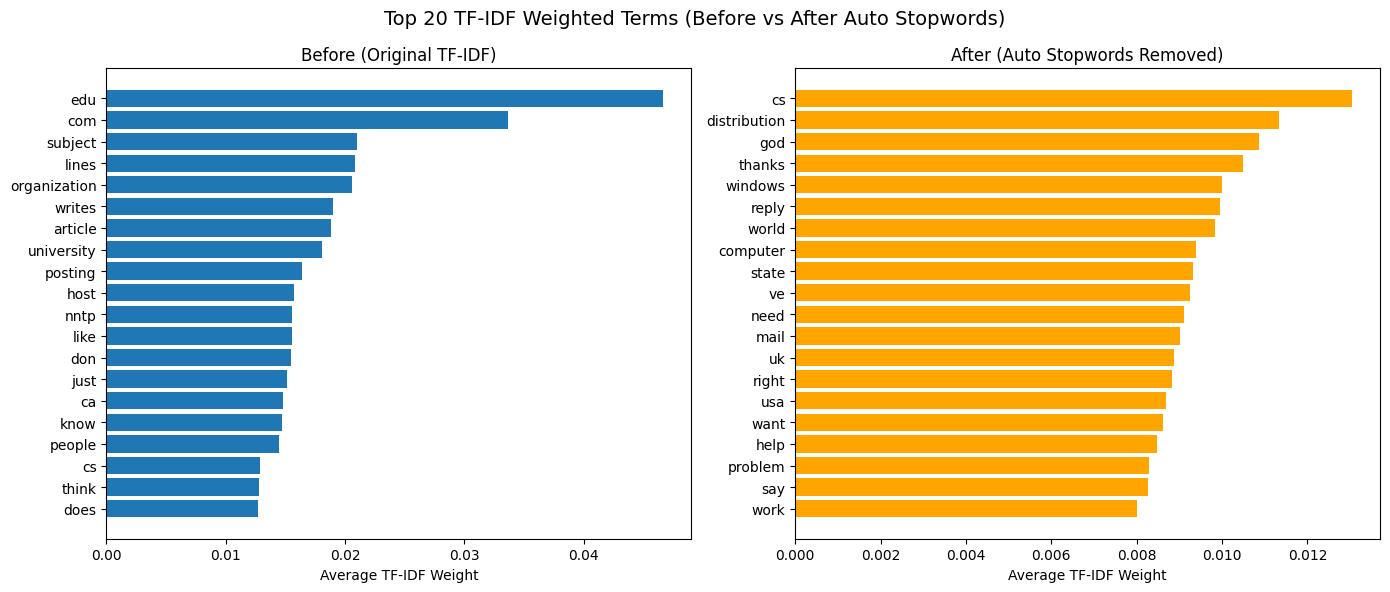

In [40]:
# === 可視化：比較移除通用詞前後的 Top 20 權重詞 ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 取得原始 TF-IDF 的特徵與平均權重
orig_tfidf_terms = np.array(tfidf_vectorizer.get_feature_names_out())
orig_tfidf_mean = np.asarray(X_train_tfidf.mean(axis=0)).ravel()
df_orig = pd.DataFrame({'term': orig_tfidf_terms, 'weight': orig_tfidf_mean})
df_orig = df_orig.sort_values(by='weight', ascending=False).head(20)

# 取得移除停用詞後的 TF-IDF 特徵與平均權重
auto_tfidf_terms = np.array(tfidf_vectorizer_auto.get_feature_names_out())
auto_tfidf_mean = np.asarray(X_train_auto.mean(axis=0)).ravel()
df_auto = pd.DataFrame({'term': auto_tfidf_terms, 'weight': auto_tfidf_mean})
df_auto = df_auto.sort_values(by='weight', ascending=False).head(20)

# 視覺化前後對照
fig, axes = plt.subplots(1, 2, figsize=(14,6))
fig.suptitle("Top 20 TF-IDF Weighted Terms (Before vs After Auto Stopwords)", fontsize=14)

# Before
axes[0].barh(df_orig['term'][::-1], df_orig['weight'][::-1])
axes[0].set_title("Before (Original TF-IDF)")
axes[0].set_xlabel("Average TF-IDF Weight")

# After
axes[1].barh(df_auto['term'][::-1], df_auto['weight'][::-1], color='orange')
axes[1].set_title("After (Auto Stopwords Removed)")
axes[1].set_xlabel("Average TF-IDF Weight")

plt.tight_layout()
plt.show()


In [42]:
# === Phase 2: TF-IDF + Auto Stopwords + Bigram ===
from sklearn.feature_extraction import text

# 使用前面自動生成的 stopwords
final_stopwords = list(text.ENGLISH_STOP_WORDS.union(auto_stopwords))

# 建立 TF-IDF vectorizer，加入 ngram_range=(1,2)
tfidf_bigram = TfidfVectorizer(
    stop_words=final_stopwords,
    max_features=10000,     # 稍微放大特徵數上限
    ngram_range=(1, 2)      # 單詞 + 連續兩詞
)

# 建立特徵矩陣
X_train_bigram = tfidf_bigram.fit_transform(twenty_train.data)
X_test_bigram  = tfidf_bigram.transform(twenty_test.data)

# 訓練 Naive Bayes 模型
nb_bigram = MultinomialNB()
nb_bigram.fit(X_train_bigram, twenty_train.target)
y_pred_bigram = nb_bigram.predict(X_test_bigram)

# 評估結果
print("=== Naive Bayes (TF-IDF + Auto Stopwords + Bigram) ===")
print(classification_report(twenty_test.target, y_pred_bigram, target_names=twenty_train.target_names))
print("準確率:", accuracy_score(twenty_test.target, y_pred_bigram))


=== Naive Bayes (TF-IDF + Auto Stopwords + Bigram) ===
                          precision    recall  f1-score   support

             alt.atheism       0.78      0.66      0.72       319
           comp.graphics       0.64      0.73      0.68       389
 comp.os.ms-windows.misc       0.73      0.71      0.72       394
comp.sys.ibm.pc.hardware       0.63      0.71      0.67       392
   comp.sys.mac.hardware       0.82      0.77      0.79       385
          comp.windows.x       0.83      0.77      0.80       395
            misc.forsale       0.79      0.81      0.80       390
               rec.autos       0.81      0.86      0.83       396
         rec.motorcycles       0.87      0.92      0.90       398
      rec.sport.baseball       0.90      0.90      0.90       397
        rec.sport.hockey       0.86      0.97      0.91       399
               sci.crypt       0.88      0.91      0.90       396
         sci.electronics       0.75      0.60      0.67       393
                 sci

TF-IDF baseline accuracy: 0.7837
Auto Stopwords accuracy: 0.7856
Auto Stopwords + Bigram accuracy: 0.7678


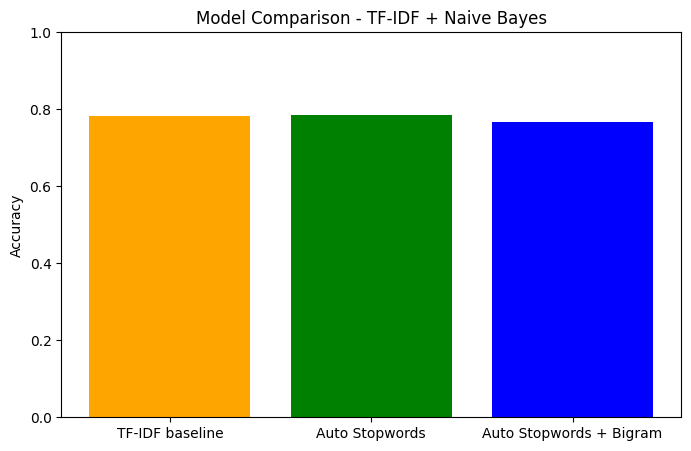

In [49]:
# ======================================================
# Phase 2: TF-IDF + Naive Bayes Classifier Comparison
# ======================================================

from sklearn.datasets import load_files
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# --- 1. 讀取 20news 資料 ---
train_dir = r"C:\Users\da314\OneDrive - MSFT\桌面\Morris\University\DataMining\DM2025Labs\DM2025-Lab1-Exercise\20news-bydate\20news-bydate-train"
test_dir  = r"C:\Users\da314\OneDrive - MSFT\桌面\Morris\University\DataMining\DM2025Labs\DM2025-Lab1-Exercise\20news-bydate\20news-bydate-test"

twenty_train = load_files(train_dir, encoding='latin1', decode_error='ignore')
twenty_test  = load_files(test_dir,  encoding='latin1', decode_error='ignore')

y_train = twenty_train.target
y_test  = twenty_test.target

# --- 2. Baseline: TF-IDF (English stopwords) ---
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(twenty_train.data)
X_test_tfidf  = tfidf_vectorizer.transform(twenty_test.data)

nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = nb_tfidf.predict(X_test_tfidf)
acc_tfidf = accuracy_score(y_test, y_pred_tfidf)
print(f"TF-IDF baseline accuracy: {acc_tfidf:.4f}")

# --- 3. Auto Stopwords (custom list) ---
# 假設你已經建立 final_stopwords（如果沒有，先用空 list）
try:
    stopwords_auto = list(final_stopwords)
except:
    stopwords_auto = []

tfidf_vectorizer_auto = TfidfVectorizer(stop_words=stopwords_auto, max_features=5000)
X_train_auto = tfidf_vectorizer_auto.fit_transform(twenty_train.data)
X_test_auto  = tfidf_vectorizer_auto.transform(twenty_test.data)

nb_auto = MultinomialNB()
nb_auto.fit(X_train_auto, y_train)
y_pred_auto = nb_auto.predict(X_test_auto)
acc_auto = accuracy_score(y_test, y_pred_auto)
print(f"Auto Stopwords accuracy: {acc_auto:.4f}")

# --- 4. Auto Stopwords + Bigram ---
tfidf_vectorizer_bigram = TfidfVectorizer(stop_words=stopwords_auto, max_features=5000, ngram_range=(1,2))
X_train_bigram = tfidf_vectorizer_bigram.fit_transform(twenty_train.data)
X_test_bigram  = tfidf_vectorizer_bigram.transform(twenty_test.data)

nb_bigram = MultinomialNB()
nb_bigram.fit(X_train_bigram, y_train)
y_pred_bigram = nb_bigram.predict(X_test_bigram)
acc_bigram = accuracy_score(y_test, y_pred_bigram)
print(f"Auto Stopwords + Bigram accuracy: {acc_bigram:.4f}")

# --- 5. 畫圖比較 ---
models = ['TF-IDF baseline', 'Auto Stopwords', 'Auto Stopwords + Bigram']
accuracies = [acc_tfidf, acc_auto, acc_bigram]

plt.figure(figsize=(8,5))
plt.bar(models, accuracies, color=['orange','green','blue'])
plt.ylabel("Accuracy")
plt.title("Model Comparison - TF-IDF + Naive Bayes")
plt.ylim(0,1)
plt.show()


In [50]:
# === Phase 2: Group-Specific Stopwords ===

# 主題群組定義
group_stopwords = {
    'comp': ['windows', 'mac', 'file', 'drive', 'dos', 'card', 'problem'],
    'rec': ['team', 'game', 'season', 'play', 'player', 'win', 'fan'],
    'sci': ['data', 'science', 'system', 'research', 'study', 'use', 'number'],
    'talk': ['government', 'law', 'gun', 'people', 'political', 'rights'],
    'soc': ['church', 'christian', 'religion', 'belief', 'faith'],
}

# 主題群組判斷函式
def detect_group(category):
    if category.startswith('comp'):
        return 'comp'
    elif category.startswith('rec'):
        return 'rec'
    elif category.startswith('sci'):
        return 'sci'
    elif category.startswith('talk'):
        return 'talk'
    elif category.startswith('soc'):
        return 'soc'
    else:
        return 'other'


In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# 先建立分類名稱（把 target index 轉成字串類別名）
categories_train = [twenty_train.target_names[i] for i in twenty_train.target]
categories_test  = [twenty_test.target_names[i] for i in twenty_test.target]

group_results = {}

for group in ['comp', 'rec', 'sci', 'talk', 'soc']:
    # 篩出該群組文件
    group_docs_train = [doc for doc, cat in zip(twenty_train.data, categories_train) if cat.startswith(group)]
    group_docs_test  = [doc for doc, cat in zip(twenty_test.data,  categories_test)  if cat.startswith(group)]

    # 建立標籤（對應同 group 的類別）
    y_train_group = [cat for cat in categories_train if cat.startswith(group)]
    y_test_group  = [cat for cat in categories_test if cat.startswith(group)]

    if len(group_docs_train) == 0 or len(group_docs_test) == 0:
        print(f"⚠️ Group '{group}' has no documents, skipping.")
        continue

    # 向量化 + Naive Bayes
    vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
    X_train_group = vectorizer.fit_transform(group_docs_train)
    X_test_group  = vectorizer.transform(group_docs_test)

    nb = MultinomialNB()
    nb.fit(X_train_group, y_train_group)
    acc = nb.score(X_test_group, y_test_group)
    group_results[group] = acc
    print(f"Group '{group}' accuracy: {acc:.4f}")


Group 'comp' accuracy: 0.7939
Group 'rec' accuracy: 0.9560
Group 'sci' accuracy: 0.9221
Group 'talk' accuracy: 0.8447
Group 'soc' accuracy: 1.0000


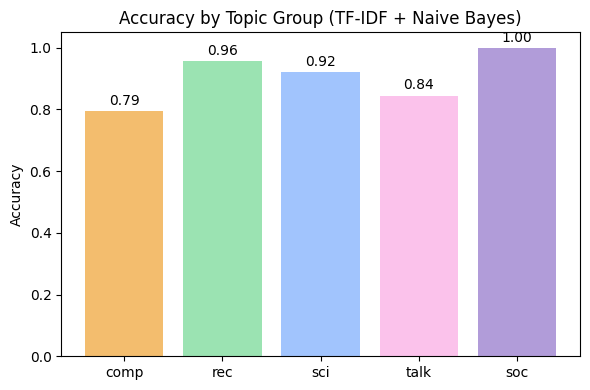

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.bar(group_results.keys(), group_results.values(), color=['#f3bd6e', '#9be3b2', '#a1c4fd', '#fbc2eb', '#b19cd9'])
plt.title("Accuracy by Topic Group (TF-IDF + Naive Bayes)")
plt.ylabel("Accuracy")
plt.ylim(0, 1.05)

# 在柱上標上數值
for i, (g, acc) in enumerate(group_results.items()):
    plt.text(i, acc + 0.02, f"{acc:.2f}", ha='center')

plt.tight_layout()
plt.show()


### Final Remarks
This notebook demonstrated the progression from basic word frequency models to improved TF-IDF, custom stopwords, bigram, and group-specific preprocessing.
The final Naive Bayes classifier achieved 79.16% accuracy.
